In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
students = pd.read_csv('student.csv')
print(students.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [ ]:
students['Extracurricular Activities'] = students['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

print(students.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


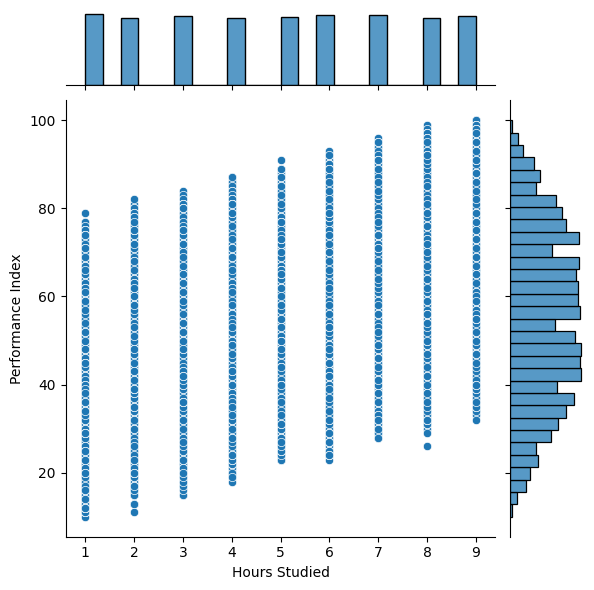

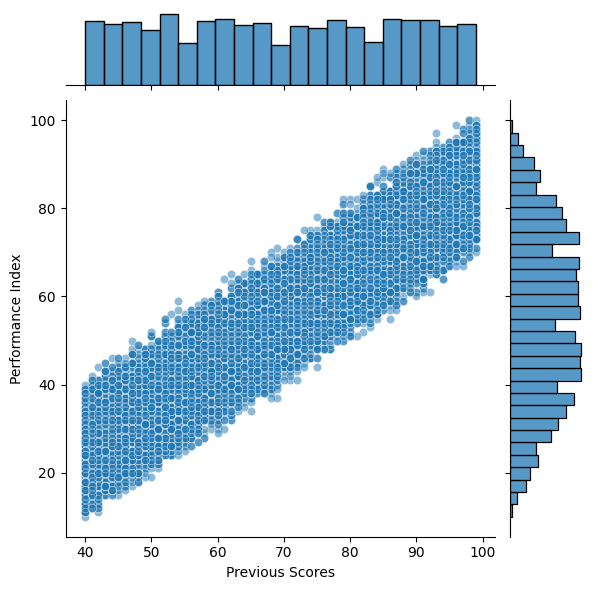

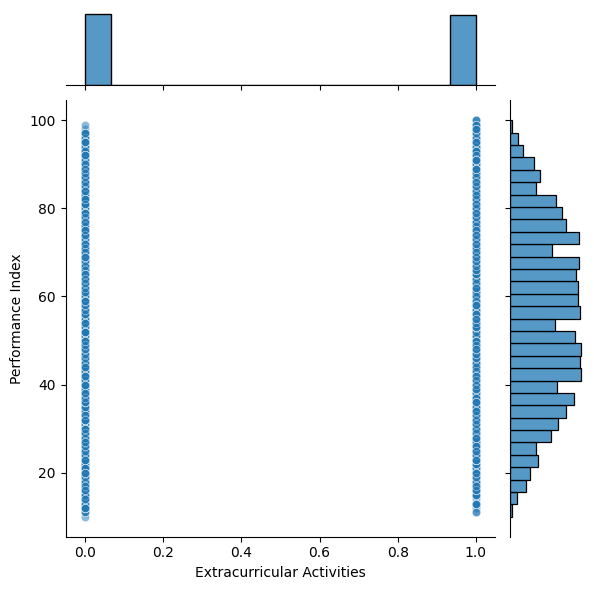

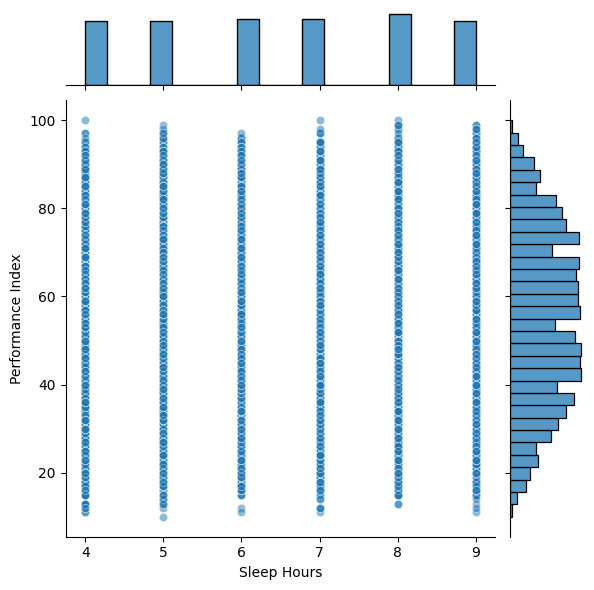

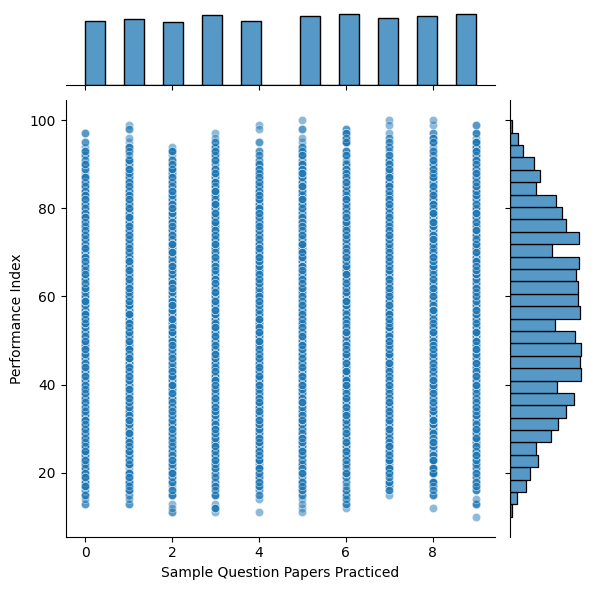

In [ ]:
sns.jointplot(x='Hours Studied', y='Performance Index', data=students, alpha=1)
sns.jointplot(x='Previous Scores', y='Performance Index', data=students, alpha=0.5)
sns.jointplot(x='Extracurricular Activities', y='Performance Index', data=students, alpha=0.5)
sns.jointplot(x='Sleep Hours', y='Performance Index', data=students, alpha=0.5)
sns.jointplot(x='Sample Question Papers Practiced', y='Performance Index', data=students, alpha=0.5)

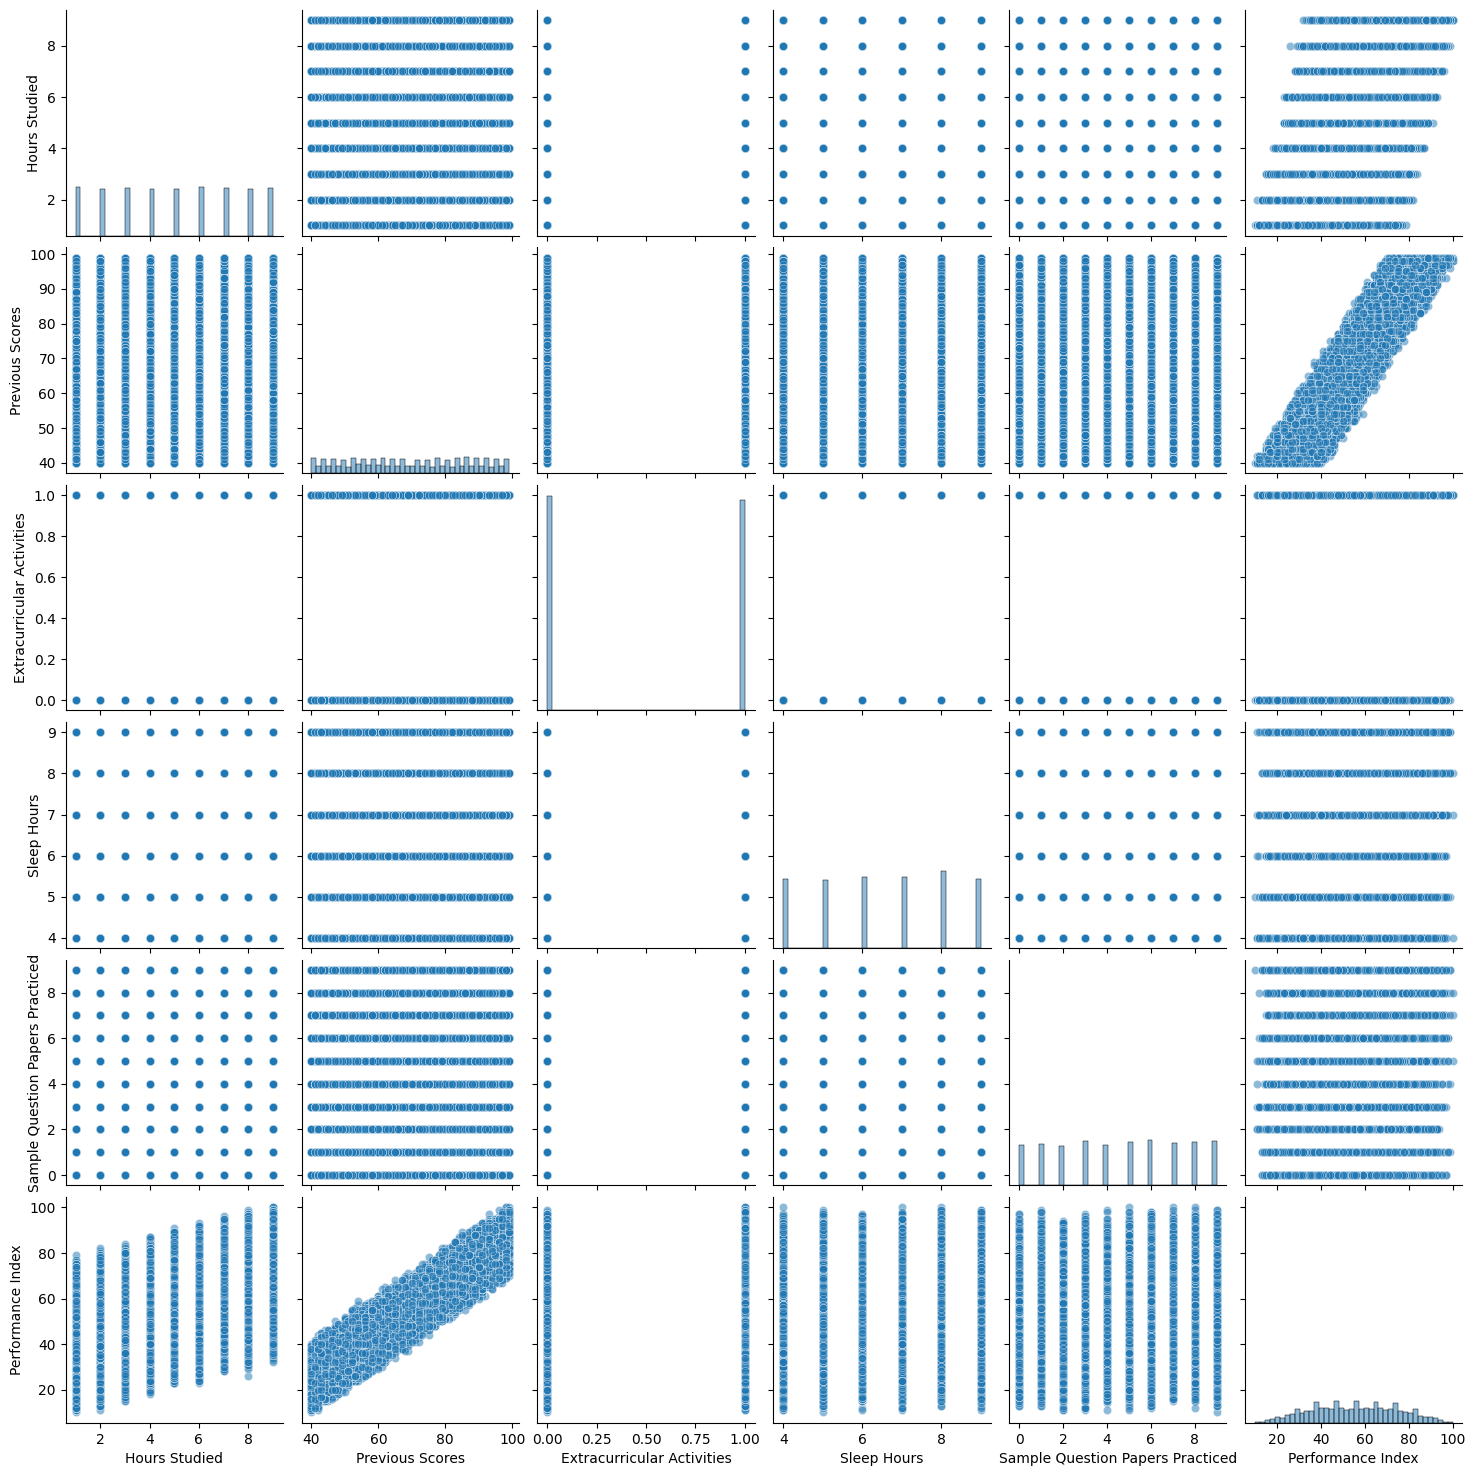

In [ ]:
sns.pairplot(students,
             kind='scatter',
             plot_kws={'alpha':0.5},
             diag_kws={'alpha':0.5, 'bins':40})


In [ ]:
x = students.drop(['Performance Index'],axis=1)
y = students['Performance Index']

In [ ]:
print(x.iloc[1])
print("performance index=",y.iloc[1])
print(len(x))

Hours Studied                        4
Previous Scores                     82
Extracurricular Activities           0
Sleep Hours                          4
Sample Question Papers Practiced     2
Name: 1, dtype: int64
performance index= 65.0
10000


In [ ]:
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.3, random_state = 30)
lreg = lr()
lreg.fit(x_train,y_train)

LinearRegression()

In [ ]:
lreg.coef_

array([2.85254424, 1.01807422, 0.59458479, 0.48420379, 0.19416567])

In [ ]:
y_pred = lreg.predict(x_test)

In [ ]:
for i in range(15):
    print(y_test.iloc[i], f"{y_pred[i]:.2f} = {y_test.iloc[i]-y_pred[i]:.2f}")


55.0 57.57 = -2.57
47.0 47.78 = -0.78
59.0 60.03 = -1.03
42.0 40.82 = 1.18
62.0 61.31 = 0.69
53.0 53.08 = -0.08
85.0 82.33 = 2.67
20.0 19.76 = 0.24
26.0 27.36 = -1.36
56.0 57.42 = -1.42
49.0 48.40 = 0.60
33.0 34.43 = -1.43
82.0 82.13 = -0.13
52.0 53.73 = -1.73
39.0 37.67 = 1.33


Text(0, 0.5, 'Predicted')

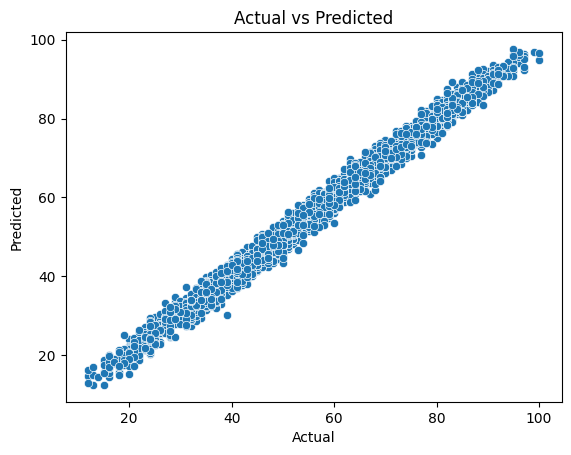

In [ ]:
sns.scatterplot(x = y_test, y = y_pred)

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')


In [ ]:
print('Mean absolute error=', mean_absolute_error(y_test,y_pred))
print('Mean squared error=', mean_squared_error(y_test,y_pred))
print('Root mean squared error=', (mean_squared_error(y_test,y_pred))**0.5)
resdul = y_test - y_pred
print(resdul)
print("_"*100)
resdul.describe()

Mean absolute error= 1.6014042053092186
Mean squared error= 4.043070898725509
Root mean squared error= 2.0107388937217854
8793   -2.566579
1122   -0.779532
1283   -1.030541
9318    1.184525
7765    0.694084
          ...   
3024   -4.352456
5904   -1.032588
3807   -0.088024
6746    4.732812
7377   -0.722134
Name: Performance Index, Length: 3000, dtype: float64
____________________________________________________________________________________________________


count    3000.000000
mean       -0.072704
std         2.009759
min        -6.656166
25%        -1.425233
50%        -0.109423
75%         1.279800
max         8.758691
Name: Performance Index, dtype: float64

<Axes: xlabel='Performance Index', ylabel='Count'>

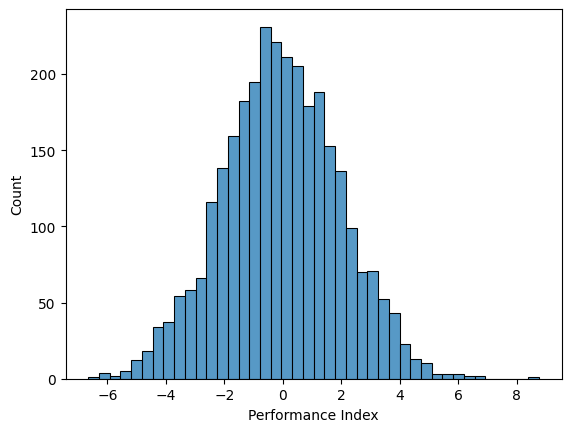

In [ ]:
sns.histplot(resdul)

<ipython-input-31-dbbd15ef7f35>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resdul)


<Axes: xlabel='Performance Index', ylabel='Density'>

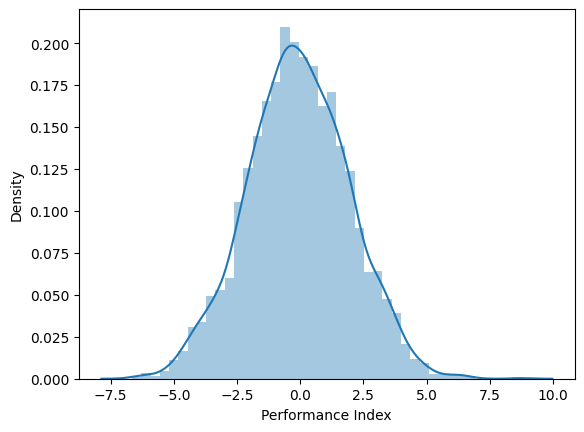

In [ ]:
sns.distplot(resdul)